In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# -------------------------------
# 1. LOAD DATA
# -------------------------------

# Rental Registry Dataset
rental_file = "C:/Users/sonar/Downloads/Datasets/rental_registry.csv"
rental_df = pd.read_csv(rental_file)

# Crime Dataset (choose Part II or Calls for Service)
crime_file = "C:/Users/sonar/Downloads/Datasets/crime_2024.csv"
crime_df = pd.read_csv(crime_file)

# Kindergarten Readiness / Poverty Dataset
kinder_file = "C:/Users/sonar/Downloads/Datasets/kinder_poverty.csv"
kinder_df = pd.read_csv(kinder_file)

In [3]:
print("Rental Registry:")
print(rental_df.head())
print(rental_df.info())

Rental Registry:
              X             Y           SBL                   PropertyAddress  \
0 -8.475988e+06  5.324202e+06  005.-10-33.0                    248 Harding St   
1 -8.475966e+06  5.324309e+06  005.-11-01.0    2100 Court St & Maplehurst Ave   
2 -8.475911e+06  5.324355e+06  005.-11-04.0     2110 Court St & Darlington Rd   
3 -8.475844e+06  5.324279e+06  005.-11-09.0                 901 Darlington Rd   
4 -8.475766e+06  5.324141e+06  005.-11-19.0  200-02 Maplehurst Ave & Hillside   

     zip NeedsRR          inspect_period         completion_type_name  \
0  13208     Yes  2025/12/11 00:00:00+00                          NaN   
1  13208     Yes  2020/03/06 00:00:00+00                          NaN   
2  13208     Yes  2023/08/23 00:00:00+00                          NaN   
3  13208     Yes                     NaN                          NaN   
4  13208     Yes  2025/05/07 00:00:00+00  Rental Registry Card Issued   

          completion_date             valid_until  ...  \

In [4]:
print("=== Missing Values in Rental Registry ===")
missing_rental = rental_df.isnull().sum()
print(missing_rental)

=== Missing Values in Rental Registry ===
X                         256
Y                         256
SBL                         0
PropertyAddress             0
zip                         0
NeedsRR                     0
inspect_period           2515
completion_type_name     5873
completion_date          2515
valid_until              2515
RRisValid                   0
RR_app_received          3721
RR_ext_insp_pass         6209
RR_ext_insp_fail        10487
RR_int_insp_fail        10222
RR_int_insp_pass         6508
RR_contact_name          2574
pc_owner                  139
Latitude                  256
Longitude                 256
SHAPE                   11079
ObjectId                    0
dtype: int64


In [ ]:
rental_df['completion_date'] = pd.to_datetime(rental_df['completion_date'], errors='coerce')
rental_df['zip'] = rental_df['zip'].astype(str)

In [8]:
print("\n=== Rental Registry Missing by ZIP ===")
missing_by_zip = rental_df.groupby('zip').apply(lambda x: x.isnull().sum())
print(missing_by_zip)


=== Rental Registry Missing by ZIP ===
        X   Y  SBL  PropertyAddress  zip  NeedsRR  inspect_period  \
zip                                                                 
13202  31  31    0                0    0        0              21   
13203  14  14    0                0    0        0             249   
13204  66  66    0                0    0        0             386   
13205  40  40    0                0    0        0             579   
13206  10  10    0                0    0        0             320   
13207  12  12    0                0    0        0             140   
13208  26  26    0                0    0        0             371   
13210  39  39    0                0    0        0             270   
13214  10  10    0                0    0        0              37   
13215   1   1    0                0    0        0               8   
13224   7   7    0                0    0        0             134   

       completion_type_name  completion_date  valid_until  ...

C:\Users\sonar\AppData\Local\Temp\ipykernel_31520\2285139511.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_zip = rental_df.groupby('zip').apply(lambda x: x.isnull().sum())


In [9]:
print("\nCrime Data:")
print(crime_df.head())
print(crime_df.info())


Crime Data:
              X             Y                 DATEEND  TIMESTART  TIMEEND  \
0 -8.473510e+06  5.319566e+06  2024/02/15 00:00:00+00       1045     1045   
1 -8.475559e+06  5.323003e+06  2024/02/15 00:00:00+00       1130     1130   
2 -8.479836e+06  5.317751e+06  2024/02/15 00:00:00+00       1340     1445   
3 -8.470980e+06  5.319966e+06  2024/04/08 00:00:00+00       2040     2040   
4 -8.476202e+06  5.320346e+06  2024/02/15 00:00:00+00       1225     1501   

               ADDRESS  QualityOfLife         CODE_DEFINED        LAT  \
0    1800 ERIE BLVD E           False  OFFN AGAINST FAMILY  43.049875   
1   1500 GRANT BLVD             False  OFFN AGAINST FAMILY  43.072433   
2    400 FITCH ST               False       SIMPLE ASSAULT  43.037955   
3  300 AUDUBON PKWY             False       SIMPLE ASSAULT  43.052499   
4    700 JAMES ST               False  POSSESSION/USE DRUG  43.054994   

        LONG  ObjectId  
0 -76.118838         1  
1 -76.137239         2  
2 -76.1756

In [10]:
print("\n=== Missing Values in Crime Data ===")
missing_crime = crime_df.isnull().sum()
print(missing_crime)


=== Missing Values in Crime Data ===
X                70
Y                70
DATEEND           0
TIMESTART         0
TIMEEND           0
ADDRESS           0
QualityOfLife     0
CODE_DEFINED      0
LAT              70
LONG             70
ObjectId          0
dtype: int64


In [11]:
crime_df['DATEEND'] = pd.to_datetime(crime_df['DATEEND'], errors='coerce')
crime_df['ADDRESS'] = crime_df['ADDRESS'].astype(str)

In [12]:
print("\nKindergarten/Poverty Data:")
print(kinder_df.head())
print(kinder_df.info())


Kindergarten/Poverty Data:
   FID  Cnss_Tr   NnPv_NR   NnPvr_R   NnPvrtP   Pvrt_NR   Pvrty_R   PvrtyPr  \
0    1     1.00  0.250000  0.000000  0.250000  0.750000  0.000000  0.750000   
1    2     2.00  0.200000  0.028571  0.228571  0.571429  0.200000  0.771429   
2    3     3.00  0.058824  0.117647  0.176471  0.647059  0.176471  0.823529   
3    4     4.00  0.370370  0.111111  0.481481  0.333333  0.185185  0.518519   
4    5     5.01  0.343750  0.031250  0.375000  0.500000  0.125000  0.625000   

  StdntCn   Shape__Area  Shape__Length  
0    <=20  1.136046e+07   17623.399736  
1   21-50  2.053704e+06    6343.554874  
2    <=20  1.016083e+06    5063.497869  
3   21-50  2.831321e+06    8180.298607  
4   21-50  1.338635e+06    6802.430739  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FID            61 non-null     int64  
 1   Cnss_Tr    

In [15]:
print("Kindergarten dataset missing values:\n", kinder_df.isna().sum(), "\n")

Kindergarten dataset missing values:
 FID              0
Cnss_Tr          0
NnPv_NR          0
NnPvr_R          0
NnPvrtP          0
Pvrt_NR          0
Pvrty_R          0
PvrtyPr          0
StdntCn          0
Shape__Area      6
Shape__Length    6
dtype: int64 



In [17]:
print("=== Column Types ===")
print("Crime dataset types:\n", crime_df.dtypes)
print("Rental dataset types:\n", rental_df.dtypes)
print("Kindergarten dataset types:\n", kinder_df.dtypes)

=== Column Types ===
Crime dataset types:
 X                            float64
Y                            float64
DATEEND          datetime64[ns, UTC]
TIMESTART                      int64
TIMEEND                        int64
ADDRESS                       object
QualityOfLife                   bool
CODE_DEFINED                  object
LAT                          float64
LONG                         float64
ObjectId                       int64
dtype: object
Rental dataset types:
 X                                   float64
Y                                   float64
SBL                                  object
PropertyAddress                      object
zip                                  object
NeedsRR                              object
inspect_period                       object
completion_type_name                 object
completion_date         datetime64[ns, UTC]
valid_until                          object
RRisValid                            object
RR_app_received              

In [18]:
# Ensure numeric fields
crime_df['LAT'] = pd.to_numeric(crime_df['LAT'], errors='coerce')
crime_df['LONG'] = pd.to_numeric(crime_df['LONG'], errors='coerce')
rental_df['Latitude'] = pd.to_numeric(rental_df['Latitude'], errors='coerce')
rental_df['Longitude'] = pd.to_numeric(rental_df['Longitude'], errors='coerce')
kinder_df[['NnPv_NR', 'NnPvr_R', 'Pvrt_NR', 'Pvrty_R', 'NnPvrtP', 'PvrtyPr', 'StdntCn']] = kinder_df[['NnPv_NR', 'NnPvr_R', 'Pvrt_NR', 'Pvrty_R', 'NnPvrtP', 'PvrtyPr', 'StdntCn']].apply(pd.to_numeric, errors='coerce')

In [19]:
# Step 4: Summary statistics
# -----------------------------
print("=== Crime Data Summary ===")
print(crime_df.describe(include='all'))

=== Crime Data Summary ===
                   X             Y                              DATEEND  \
count   6.623000e+03  6.623000e+03                                 6693   
unique           NaN           NaN                                  NaN   
top              NaN           NaN                                  NaN   
freq             NaN           NaN                                  NaN   
mean   -8.476767e+06  5.318854e+06  2024-06-26 11:16:38.834603264+00:00   
min    -8.482844e+06  5.309707e+06            2015-12-31 00:00:00+00:00   
25%    -8.478104e+06  5.317156e+06            2024-04-06 00:00:00+00:00   
50%    -8.476844e+06  5.319192e+06            2024-07-03 00:00:00+00:00   
75%    -8.475863e+06  5.321030e+06            2024-09-18 00:00:00+00:00   
max    -8.468727e+06  5.329331e+06            2024-12-31 00:00:00+00:00   
std     2.294658e+03  2.890354e+03                                  NaN   

          TIMESTART      TIMEEND           ADDRESS QualityOfLife  \
coun

In [20]:
print("=== Rental Registry Summary ===")
print(rental_df.describe(include='all'))

=== Rental Registry Summary ===
                   X             Y           SBL     PropertyAddress    zip  \
count   1.082300e+04  1.082300e+04         11079               11079  11079   
unique           NaN           NaN         11042               11042     11   
top              NaN           NaN  012.-04-01.0  104 Wainwright Ave  13205   
freq             NaN           NaN             2                   2   2213   
mean   -8.468544e+06  5.313937e+06           NaN                 NaN    NaN   
min    -8.482668e+06  0.000000e+00           NaN                 NaN    NaN   
25%    -8.478204e+06  5.316585e+06           NaN                 NaN    NaN   
50%    -8.476456e+06  5.319037e+06           NaN                 NaN    NaN   
75%    -8.474063e+06  5.321627e+06           NaN                 NaN    NaN   
max     0.000000e+00  5.324736e+06           NaN                 NaN    NaN   
std     2.575618e+05  1.616390e+05           NaN                 NaN    NaN   

       NeedsRR     

In [21]:

print("=== Kindergarten/Poverty Summary ===")
print(kinder_df[['Pvrty_R', 'Pvrt_NR', 'NnPvr_R', 'NnPv_NR']].describe())

=== Kindergarten/Poverty Summary ===
         Pvrty_R    Pvrt_NR    NnPvr_R    NnPv_NR
count  61.000000  61.000000  61.000000  61.000000
mean    0.119843   0.493534   0.154396   0.215833
std     0.102057   0.247087   0.195978   0.188788
min     0.000000   0.000000   0.000000   0.000000
25%     0.038462   0.407407   0.000000   0.100000
50%     0.111111   0.500000   0.100000   0.200000
75%     0.176471   0.625000   0.240000   0.277778
max     0.500000   1.000000   1.000000   1.000000


In [22]:
print("Crime location coverage (Lat/Long):\n", crime_df[['LAT', 'LONG']].describe())

Crime location coverage (Lat/Long):
                LAT         LONG
count  6623.000000  6623.000000
mean     43.045196   -76.148092
std       0.018977     0.020613
min      42.985116   -76.202688
25%      43.034049   -76.160105
50%      43.047416   -76.148782
75%      43.059485   -76.139977
max      43.113942   -76.075873


In [23]:
print("Rental location coverage (Lat/Long):\n", rental_df[['Latitude', 'Longitude']].describe())

Rental location coverage (Lat/Long):
            Latitude     Longitude
count  10823.000000  10823.000000
mean      43.005405    -76.074225
std        1.308050      2.313717
min        0.000000    -76.201100
25%       43.030300    -76.161000
50%       43.046400    -76.145300
75%       43.063400    -76.123800
max       43.083800      0.000000


In [24]:
print("Kindergarten Census Tract coverage:\n", kinder_df['Cnss_Tr'].nunique())

Kindergarten Census Tract coverage:
 61


In [25]:
crime_missing_geo = crime_df[crime_df['LAT'].isna() | crime_df['LONG'].isna()]

In [26]:
rental_missing_geo = rental_df[rental_df['Latitude'].isna() | rental_df['Longitude'].isna()]

In [27]:
kinder_missing_geo = kinder_df[kinder_df[['NnPv_NR', 'NnPvr_R', 'Pvrt_NR', 'Pvrty_R']].isna().any(axis=1)]

In [28]:
print("Crime rows with missing location:", len(crime_missing_geo))
print("Rental rows with missing location:", len(rental_missing_geo))
print("Kindergarten rows with missing data:", len(kinder_missing_geo))

Crime rows with missing location: 70
Rental rows with missing location: 256
Kindergarten rows with missing data: 0


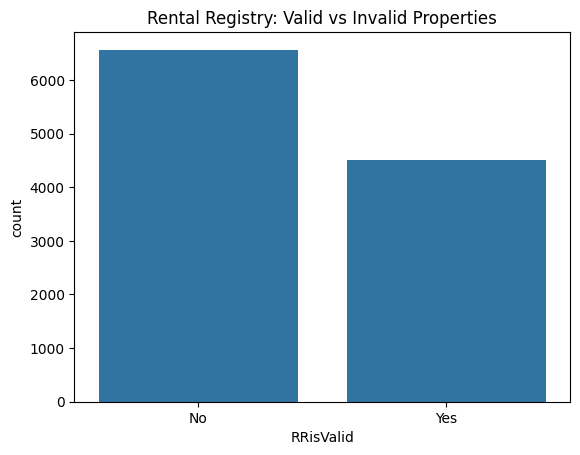

In [30]:
# Plot: Valid vs Invalid Rental Properties
sns.countplot(data=rental_df, x='RRisValid')
plt.title("Rental Registry: Valid vs Invalid Properties")
plt.show()

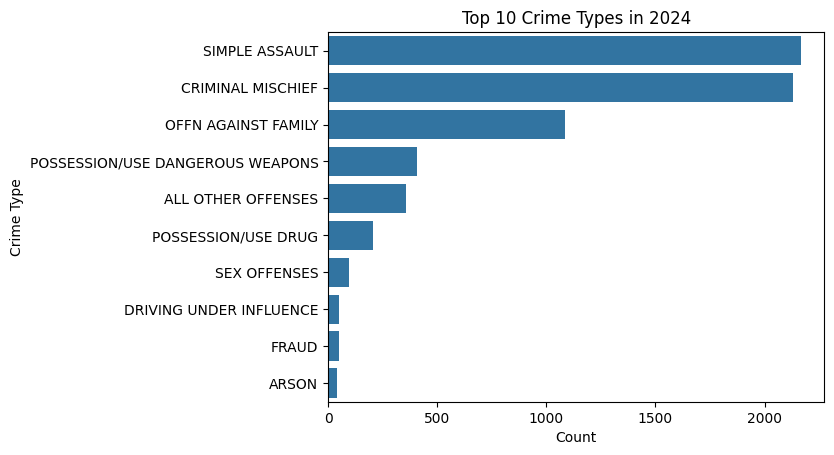

In [31]:
# Plot: Top 10 Crime Types
top_crimes = crime_df['CODE_DEFINED'].value_counts().nlargest(10)
sns.barplot(x=top_crimes.values, y=top_crimes.index)
plt.title("Top 10 Crime Types in 2024")
plt.xlabel("Count")
plt.ylabel("Crime Type")
plt.show()

In [32]:
# Sum up counts across all Census Tracts
poverty_ready = kinder_df['Pvrty_R'].sum()
poverty_not_ready = kinder_df['Pvrt_NR'].sum()
nonpoverty_ready = kinder_df['NnPvr_R'].sum()
nonpoverty_not_ready = kinder_df['NnPv_NR'].sum()

In [33]:
# Create a bar chart
labels = ['Poverty - Ready', 'Poverty - Not Ready', 'Non-Poverty - Ready', 'Non-Poverty - Not Ready']
values = [poverty_ready, poverty_not_ready, nonpoverty_ready, nonpoverty_not_ready]


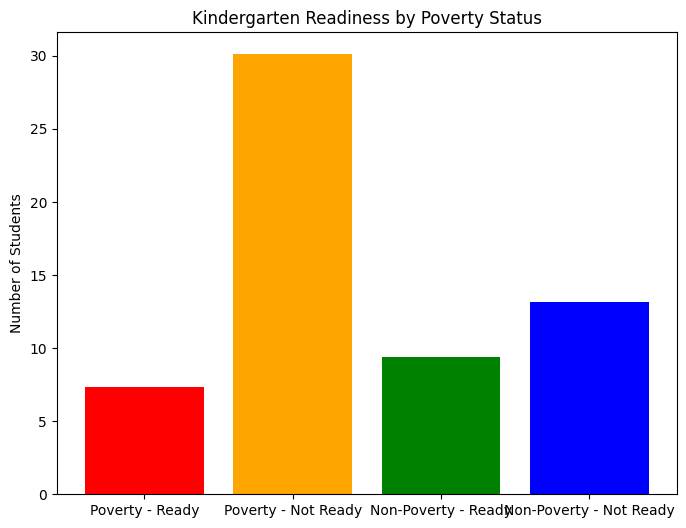

In [34]:
plt.figure(figsize=(8,6))
plt.bar(labels, values, color=['red', 'orange', 'green', 'blue'])
plt.title("Kindergarten Readiness by Poverty Status")
plt.ylabel("Number of Students")
plt.show()

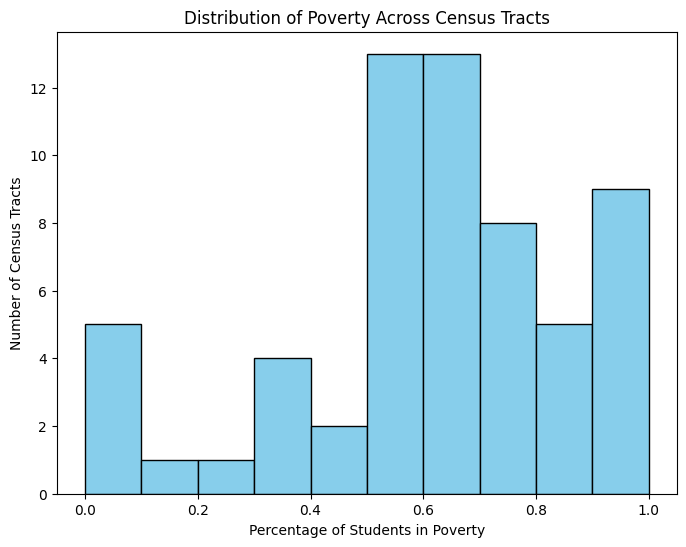

In [35]:
plt.figure(figsize=(8,6))
plt.hist(kinder_df['PvrtyPr'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel("Percentage of Students in Poverty")
plt.ylabel("Number of Census Tracts")
plt.title("Distribution of Poverty Across Census Tracts")
plt.show()


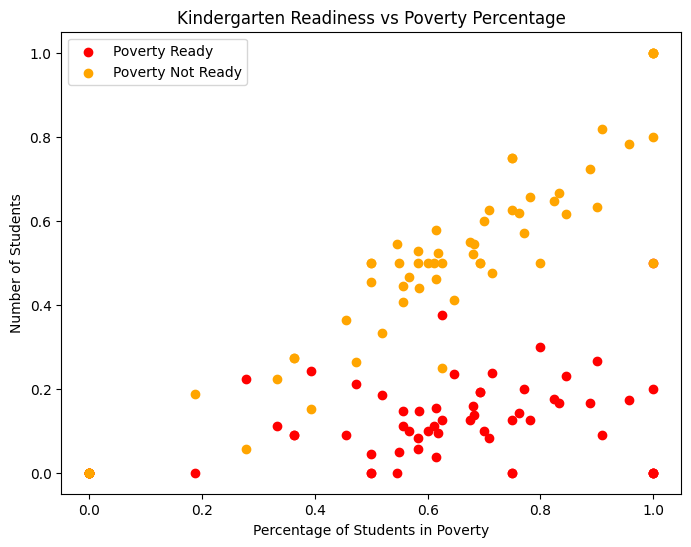

In [36]:
plt.figure(figsize=(8,6))
plt.scatter(kinder_df['PvrtyPr'], kinder_df['Pvrty_R'], color='red', label='Poverty Ready')
plt.scatter(kinder_df['PvrtyPr'], kinder_df['Pvrt_NR'], color='orange', label='Poverty Not Ready')
plt.xlabel("Percentage of Students in Poverty")
plt.ylabel("Number of Students")
plt.title("Kindergarten Readiness vs Poverty Percentage")
plt.legend()
plt.show()


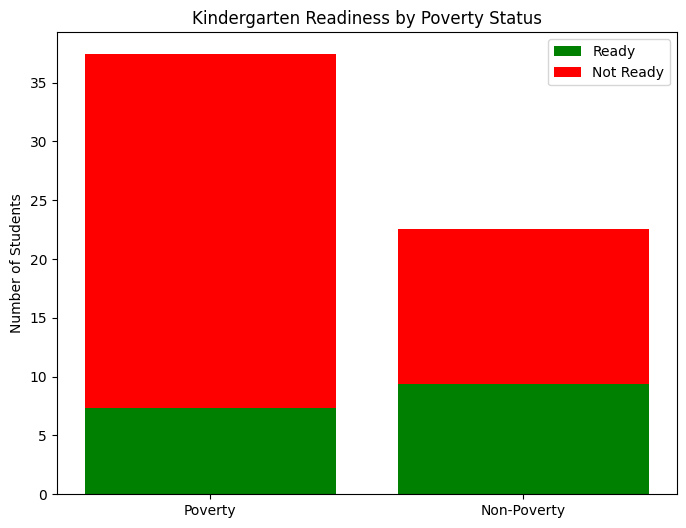

In [ ]:
# Values
poverty_counts = kinder_df[['Pvrty_R', 'Pvrt_NR']].sum()
nonpoverty_counts = kinder_df[['NnPvr_R', 'NnPv_NR']].sum()

labels = ['Poverty', 'Non-Poverty']
ready_counts = [poverty_counts['Pvrty_R'], nonpoverty_counts['NnPvr_R']]
not_ready_counts = [poverty_counts['Pvrt_NR'], nonpoverty_counts['NnPv_NR']]

x = np.arange(len(labels))

plt.figure(figsize=(8,6))
plt.bar(x, ready_counts, label='Ready', color='green')
plt.bar(x, not_ready_counts, bottom=ready_counts, label='Not Ready', color='red')
plt.xticks(x, labels)
plt.ylabel("Number of Students")
plt.title("Kindergarten Readiness by Poverty Status")
plt.legend()
plt.show()
